# Don't touch anything in the next cell!


In [1]:
import os
import cv2
import glob
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
import time
import requests
from ipywidgets import Image

def ReadImages():
    lambo = []
    ferrari = []

    for i in range(10):
        im = cv2.imread("Lambo64x64/"+str(i)+".png")
        im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
        lambo.append(im)
        im = cv2.imread("Ferrari64x64/"+str(i)+".png")
        im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
        ferrari.append(im)
        
    return lambo, ferrari

def Evaluation():
    ev = []
    for i in range(6):
        im = cv2.imread("test/"+str(i)+".jpg")
        im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
        feature = extract_features(cv2.resize(im,(64,64)))
        scaled_features = scaler.transform(feature.reshape(1, -1))
        ev.append(int(svc.predict(scaled_features)))

    print(ev)
    if ev==[1,1,0,0,1,0]:
        im = cv2.imread("img/1.jpg")
        im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
        plt.imshow(im)
        
        
    # Basic functions provided on Udacity's course to extract features.
def bin_spatial(img, size=(32, 32)):
    # Use cv2.resize().ravel() to create the feature vector
    features = cv2.resize(img, size).ravel() 
    # Return the feature vector
    return features

def color_hist(img, nbins=32, bins_range=(0, 256)):
    # Compute the histogram of the color channels separately
    channel1_hist = np.histogram(img[:,:,0], bins=nbins, range=bins_range)
    channel2_hist = np.histogram(img[:,:,1], bins=nbins, range=bins_range)
    channel3_hist = np.histogram(img[:,:,2], bins=nbins, range=bins_range)
    # Concatenate the histograms into a single feature vector
    hist_features = np.concatenate((channel1_hist[0], channel2_hist[0], channel3_hist[0]))
    # Return the individual histograms, bin_centers and feature vector
    return hist_features

def get_hog_features(img, orient, pix_per_cell, cell_per_block, 
                        vis=False, feature_vec=True):
    # Call with two outputs if vis==True
    if vis == True:
        features, hog_image = hog(img, orientations=orient, 
                                  pixels_per_cell=(pix_per_cell, pix_per_cell),
                                  cells_per_block=(cell_per_block, cell_per_block), 
                                  transform_sqrt=True, 
                                  visualise=vis, feature_vector=feature_vec)
        return features, hog_image
    # Otherwise call with one output
    else:      
        features = hog(img, orientations=orient, 
                       pixels_per_cell=(pix_per_cell, pix_per_cell),
                       cells_per_block=(cell_per_block, cell_per_block), 
                       transform_sqrt=True, 
                       visualise=vis, feature_vector=feature_vec)
        return features
    
def showFeatures(img, title):
    features = extract_features(img)
    
    maxi = 500
    bin_edges = []
    for i in range(32):
        bin_edges.append(i*8)

    fig, axes = plt.subplots(ncols=4, figsize=(20,5))
    axes[0].imshow(img)
    axes[0].set_title(title)
    
    axes[1].set_ylim([0,maxi])
    axes[1].set_xlim([0,256])
    axes[1].bar(bin_edges[:-1], features[0:31], width = 1, color = 'r')
    axes[1].set_title('Some Part of the feature')
    
    axes[2].set_ylim([0,maxi])
    axes[2].set_xlim([0,256])
    axes[2].bar(bin_edges[:-1], features[32:63], width = 1, color = 'g')
    axes[2].set_title('Some differnt Part of the feature')
    
    axes[3].set_ylim([0,maxi])
    axes[3].set_xlim([0,256])
    axes[3].bar(bin_edges[:-1], features[64:95], width = 1, color = 'b')
    axes[3].set_title('The last part of the feature')

# Code changes only in the following two code-cells!

## The first thing you have to do is to select suitable features


In [2]:
def extract_features(image):
    
    #Have a look at the training data and identify a unique characteristic for the Lambos and Farraris, e.g. size, color, edges, position..
    #During the practice, 3 different features were introduced. The corresponding functions "bin_spatial", "color_hist" and "get_hog_features" are given above.
    #Decide which feature/s fit best for our training set and uncomment the line/s.
    
    #features1 = bin_spatial(image)
    features2 = color_hist(image)
    #features3 = get_hog_features(image)
    
    return features2


## Finish the fitModel function
Have a look at the "fitModel" function from the practice, it will be very similar! 
You only have to add code were it is stated in the comments.

In [3]:
def fitModel(positive, negative, svc, scaler ):
    """
    Trains the classifier `svc`. The feature extraction is done using the parameters stored in `params`.
    The feature scalling is done by the scaler `scaler`.
    Returns: (`svc`, fittingTime, accuracy)
    """
    
    ## Generate the positive(lambo) and negative(ferrari) feature lists
    ##Add here-----------------------
    
    positive_features = list(map(lambda img: extract_features(img), positive))
    negatice_features = list(map(lambda img: extract_features(img), negative))
    
    ##Stop here----------------------
    
    
    X = np.vstack((positive_features, negatice_features)).astype(np.float64)    
    X_scaler = scaler.fit(X)
    scaled_X = X_scaler.transform(X)
    
    y = np.hstack((np.ones(len(positive_features)), np.zeros(len(negatice_features))))
    
    # Split up data into randomized training and test sets
    ##Add here-------------------------
    
    rand_state = np.random.randint(0, 100)
    X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.2, random_state=rand_state)
    
    ##Stop here-------------------------
    
    
    t=time.time()
    
    # Use the generated train set to fit the SVM
    ##Add here----------------------------
    
    
    svc.fit(X_train, y_train)
    
    ##Stop here---------------------------------
    
    t2 = time.time()
    
    fittingTime = round(t2 - t, 5)
    accuracy = round(svc.score(X_test, y_test),4)
    return (svc, X_scaler, fittingTime, accuracy)


## Enough with function defintions...

# Don't change the code below!

### Read and visualize training images

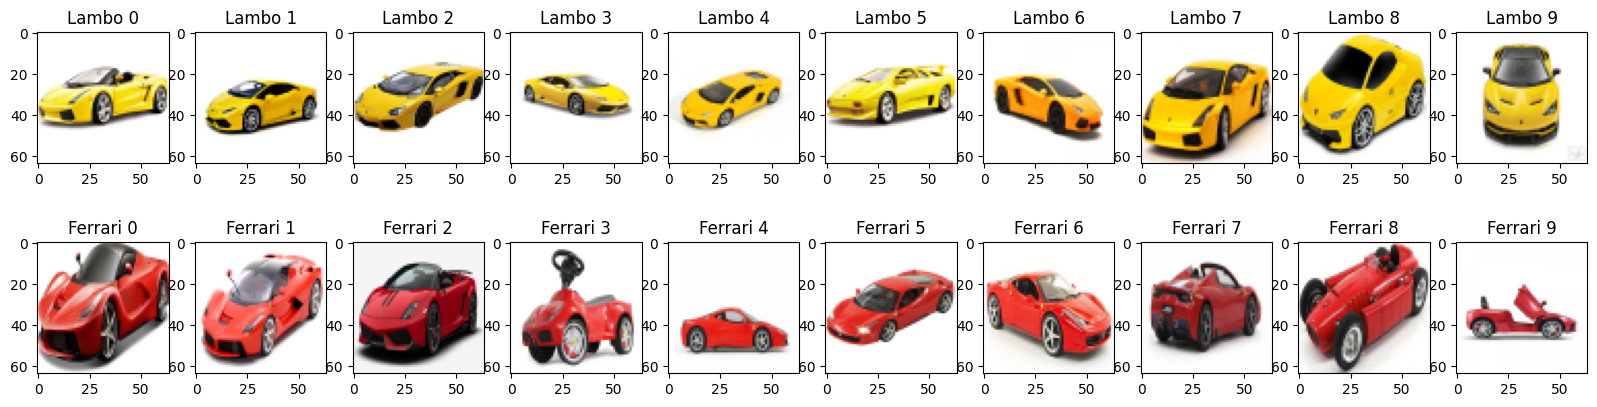

In [4]:
lambo, ferrari = ReadImages()
fig, axes = plt.subplots(ncols=10, nrows=2, figsize=(20, 5))


for i in range(10):
    axes[0,i].imshow(lambo[i])
    axes[0,i].set_title('Lambo ' + str(i))
    axes[1,i].imshow(ferrari[i])
    axes[1,i].set_title('Ferrari ' + str(i))

### Visualize features
You have to finish the "extract_features" methods to continue

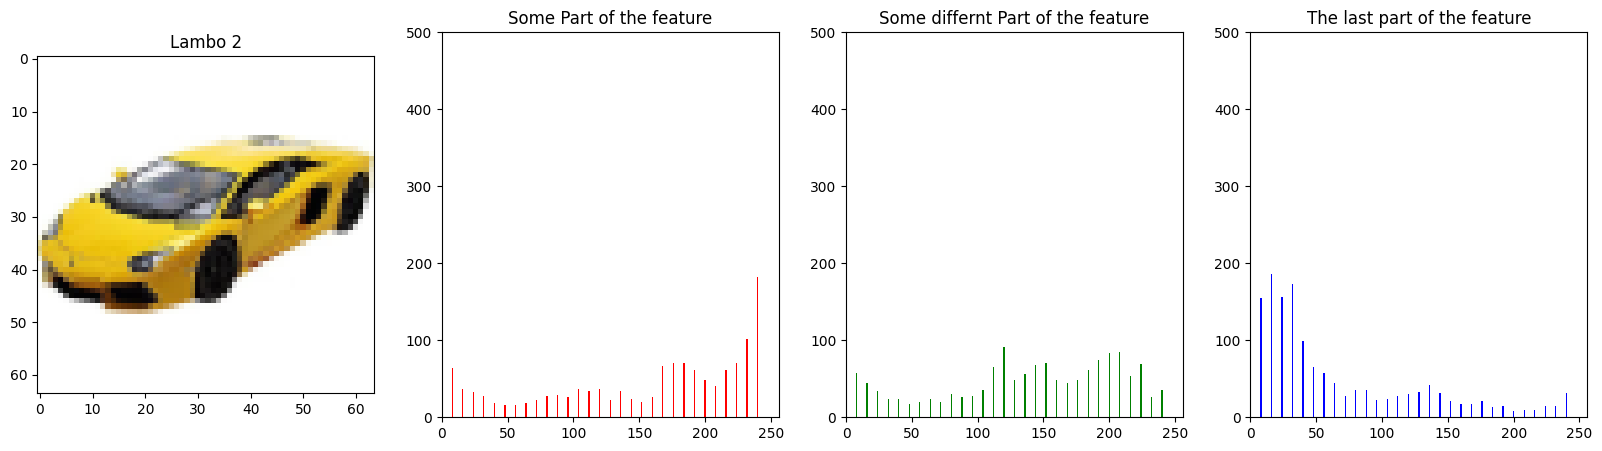

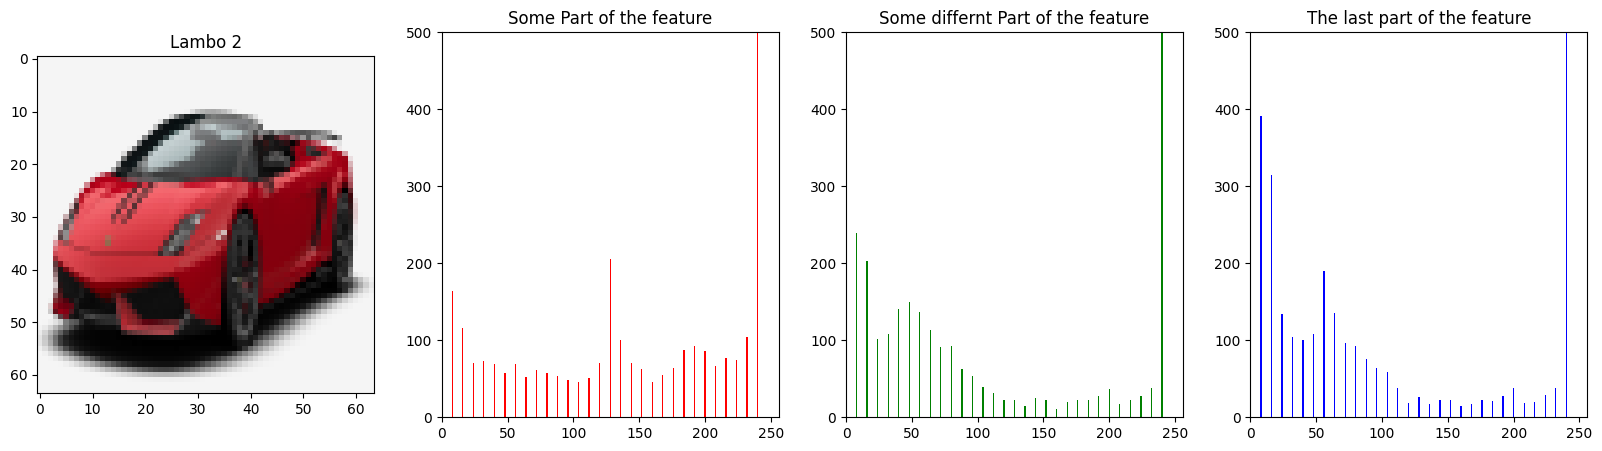

In [5]:
i = np.random.randint(0, 10)
showFeatures(lambo[i], 'Lambo ' + str(i))
showFeatures(ferrari[i], 'Lambo ' + str(i))

### Train the SVM

Lambo is the positive class, eg. label = 1
Ferrari is the negative class, eg. label = 0

You have to finish the "fitModel" function to continue. 

In [6]:
svc, scaler, fittingTime, accuracy = fitModel(lambo, ferrari, LinearSVC(), StandardScaler())
print('Fitting time: {} s, Accuracy: {}'.format(fittingTime, accuracy))

Fitting time: 0.002 s, Accuracy: 1.0


### Prediction with the classifier
This predicts the lables of previously unseen pictures. There are 6 of them in the "test" folder. Have a look at them and think about if it is what you expected. The correct output for the 6 images should be [1,1,0,0,1,0]

[1, 1, 0, 0, 1, 0]


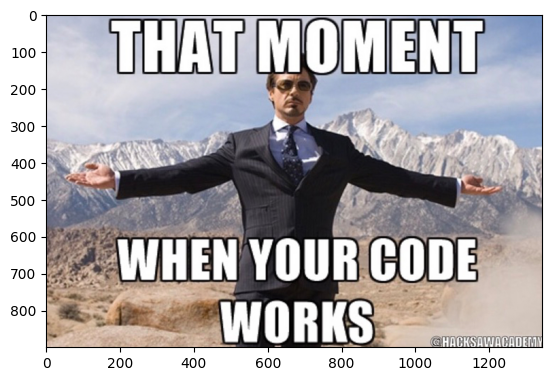

In [7]:
Evaluation()